In [5]:
#inporting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import os
#os.chdir("C:\\Users\\student\\Downloads\\")

In [7]:
#loading in dataset
df = pd.read_csv("stackoverflow_full.csv")
df.head(2)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1


In [8]:
#checking feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [9]:
#checking for null values 
df.isnull().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [10]:
#getting column names
df.columns

Index(['Unnamed: 0', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed'],
      dtype='object')

In [11]:
#dropping first column because it has no significant meaning
df = df.drop(['Unnamed: 0'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1


In [12]:
#dropping HaveWorkedWith - coding abilities are accounted for in the ComputerSkills feature
df = df.drop(['HaveWorkedWith'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1


In [13]:
#adding continent feature to group country
country_to_continent = {
'United States of America': 'North America', 'Germany': 'Europe', 'India': 'Asia', 'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Canada': 'North America', 'France': 'Europe', 'Brazil': 'South America', 'Poland': 'Europe', 
    'Netherlands': 'Europe', 'Spain': 'Europe', 'Australia': 'Oceania', 'Italy': 'Europe', 'Sweden': 'Europe', 
    'Russian Federation': 'Europe', 'Switzerland': 'Europe', 'Turkey': 'Europe', 'Austria': 'Europe', 'Israel': 'Asia',
    'Czech Republic': 'Europe', 'Mexico': 'North America', 'Belgium': 'Europe', 'Denmark': 'Europe', 'Ukraine': 'Europe',
    'Norway': 'Europe', 'Argentina': 'South America', 'Iran, Islamic Republic of...': 'Asia', 'Finland': 'Europe', 
    'South Africa': 'Africa', 'Pakistan': 'Asia', 'Portugal': 'Europe', 'Romania': 'Europe', 'Greece': 'Europe',
    'New Zealand': 'Oceania', 'Hungary': 'Europe', 'Colombia': 'South America', 'Bangladesh': 'Asia', 'Japan': 'Asia',
    'Bulgaria': 'Europe', 'China': 'Asia', 'Indonesia': 'Asia', 'Ireland': 'Europe', 'Slovenia': 'Europe', 'Nigeria': 'Africa',
    'Serbia': 'Europe', 'Egypt': 'Africa', 'Philippines': 'Asia', 'Sri Lanka': 'Asia', 'Chile': 'South America', 
    'Croatia': 'Europe', 'Lithuania': 'Europe', 'Taiwan': 'Asia', 'Singapore': 'Asia', 'Malaysia': 'Asia', 'Slovakia': 'Europe',
    'Viet Nam': 'Asia', 'Kenya': 'Africa', 'Estonia': 'Europe', 'Uruguay': 'South America', 'Nepal': 'Asia', 'Belarus': 'Europe', 
    'Thailand': 'Asia', 'Hong Kong (S.A.R.)': 'Asia', 'Peru': 'South America', 'South Korea': 'Asia', 
    'United Arab Emirates': 'Asia', 'Georgia': 'Asia', 'Venezuela, Bolivarian Republic of...': 'South America',
    'Dominican Republic': 'North America', 'Morocco': 'Africa', 'Latvia': 'Europe', 'Ecuador': 'South America', 
    'Bosnia and Herzegovina': 'Europe', 'Costa Rica': 'North America', 'Armenia': 'Asia', 'Tunisia': 'Africa', 
    'Saudi Arabia': 'Asia', 'Guatemala': 'North America', 'Kazakhstan': 'Asia', 'Paraguay': 'South America',
    'Albania': 'Europe', 'Ghana': 'Africa', 'Luxembourg': 'Europe', 'The former Yugoslav Republic of Macedonia': 'Europe',
    'Lebanon': 'Asia', 'Jordan': 'Asia', 'Ethiopia': 'Africa', 'Cyprus': 'Europe', 'Azerbaijan': 'Asia',
    'Republic of Korea': 'Asia', 'Bolivia': 'South America', 'Uganda': 'Africa', 'Republic of Moldova': 'Europe',
    'Uzbekistan': 'Asia', 'Malta': 'Europe', 'Cuba': 'North America', 'Iceland': 'Europe', 'El Salvador': 'North America', 
    'Panama': 'North America', 'United Republic of Tanzania': 'Africa', 'Syrian Arab Republic': 'Asia', 'Myanmar': 'Asia',
    'Iraq': 'Asia', 'Honduras': 'North America', 'Kosovo': 'Europe', 'Nomadic': 'Unknown', 'Mauritius': 'Africa', 
    'Cameroon': 'Africa', 'Palestine': 'Asia', 'Montenegro': 'Europe', 'Sudan': 'Africa', 'Algeria': 'Africa', 
    'Zimbabwe': 'Africa', 'Nicaragua': 'North America', 'Rwanda': 'Africa', 'Kuwait': 'Asia', 'Cambodia': 'Asia', 
    'Madagascar': 'Africa', 'Kyrgyzstan': 'Asia', 'Afghanistan': 'Asia', "Côte d'Ivoire": 'Africa', 'Mongolia': 'Asia',
    'Jamaica': 'North America', 'Trinidad and Tobago': 'North America', 'Zambia': 'Africa', 'Senegal': 'Africa', 
    'Andorra': 'Europe', 'Maldives': 'Asia', 'Bahrain': 'Asia', 'Qatar': 'Asia', 'Namibia': 'Africa', 'Benin': 'Africa',
    'Turkmenistan': 'Asia', 'Yemen': 'Asia', 'Democratic Republic of the Congo': 'Africa', 'Angola': 'Africa',
    'Oman': 'Asia', 'Congo, Republic of the...': 'Africa', 'Botswana': 'Africa', 'Mozambique': 'Africa',
    'Tajikistan': 'Asia', 'Malawi': 'Africa', 'Barbados': 'North America', 'Isle of Man': 'Europe', 
    'Guyana': 'South America', 'Swaziland': 'Africa', 'Togo': 'Africa', 'Libyan Arab Jamahiriya': 'Africa', 
    "Lao People's Democratic Republic": 'Asia', 'Somalia': 'Africa', 'Lesotho': 'Africa', 'Suriname': 'South America', 
    'Mali': 'Africa', 'Bhutan': 'Asia', 'Belize': 'North America', 'Guinea': 'Africa', 'Cape Verde': 'Africa', 
    'Haiti': 'North America', 'Fiji': 'Oceania', 'Timor-Leste': 'Asia', 'Saint Lucia': 'North America', 'Niger': 'Africa', 
    'Djibouti': 'Africa', 'Liberia': 'Africa', 'Monaco': 'Europe', 'Saint Kitts and Nevis': 'North America',
    'Gambia': 'Africa', 'Seychelles': 'Africa', 'Burkina Faso': 'Africa', 'Saint Vincent and the Grenadines': 'North America',
    'Burundi': 'Africa', 'Dominica': 'North America', 'Mauritania': 'Africa'

}

df['Continent'] = df['Country'].map(country_to_continent)

df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,0,North America
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,0,Asia


In [14]:
#dropping Country column - when applying one hot encoder we do not want to end up with 170+ features
df = df.drop(['Country'], axis=1)
df.head(2)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,12,1,Europe


In [15]:
#getting list of names of all the categorical variables
cat_var = df.select_dtypes(include=['object']).columns.tolist()
cat_var

['Age',
 'Accessibility',
 'EdLevel',
 'Gender',
 'MentalHealth',
 'MainBranch',
 'Continent']

In [16]:
#converting list to a categorical dataframe
cat_df = df[cat_var]
cat_df.head(2)

,Age,Accessibility,EdLevel,Gender,MentalHealth,MainBranch,Continent
0,<35,No,Master,Man,No,Dev,Europe
1,<35,No,Undergraduate,Man,No,Dev,Europe


In [17]:
#prepped to use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Perform one-hot encoding - this is stored as an array
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(cat_df)

# creating a dataframe with encoded features
categorical_encoded_df = pd.DataFrame(categorical_encoded, 
                                        columns=encoder.get_feature_names_out())

#outputting
categorical_encoded_df.head()

C:\Users\student\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,...,MentalHealth_Yes,MainBranch_Dev,MainBranch_NotDev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
categorical_encoded_df.columns

Index(['Age_<35', 'Age_>35', 'Accessibility_No', 'Accessibility_Yes',
       'EdLevel_Master', 'EdLevel_NoHigherEd', 'EdLevel_Other', 'EdLevel_PhD',
       'EdLevel_Undergraduate', 'Gender_Man', 'Gender_NonBinary',
       'Gender_Woman', 'MentalHealth_No', 'MentalHealth_Yes', 'MainBranch_Dev',
       'MainBranch_NotDev', 'Continent_Africa', 'Continent_Asia',
       'Continent_Europe', 'Continent_North America', 'Continent_Oceania',
       'Continent_South America', 'Continent_Unknown'],
      dtype='object')

In [20]:
#dropping feature to prevent dependencies
categorical_encoded_df = categorical_encoded_df.drop(['Age_>35', 'Accessibility_No','EdLevel_Other','Gender_NonBinary',
                                                     'MentalHealth_No','MainBranch_NotDev','Continent_Unknown'], axis=1)
categorical_encoded_df.head(2)

,Age_<35,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_Woman,MentalHealth_Yes,MainBranch_Dev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
# Drop the original categorical columns from X
df_encoded = df.drop(columns=cat_var)

# Concatenate the one-hot encoded categorical variables with the rest of the features
df_encoded = pd.concat([df_encoded,categorical_encoded_df], axis=1)

#viewing dataset
df_encoded.head()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age_<35,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,...,Gender_Man,Gender_Woman,MentalHealth_Yes,MainBranch_Dev,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,7,4,51552.0,4,0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,12,5,46482.0,12,1,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,15,6,77290.0,7,0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,9,6,46135.0,13,0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,40,30,160932.0,2,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
# Establish our target feature, churn, as our y feature
y = df_encoded['Employed']

# Drop our target feature from our features dataframe
X = df_encoded.drop('Employed', axis = 1)

In [ ]:
# so far we have created: 

# df - contains actual values in dataframe
# df_encoded - is our encoded dataframe
# y - target variable 
# X - features encoded 

# before any splitting or training, 
# pausing to explore trends in the data 

In [23]:
#creating function to exploring relationship between Employment and Variables
def paired_bar(df,var,title):
    copy = df.copy()
    copy = copy.groupby(var)['Employed'].value_counts().to_frame()
    copy = copy.rename({'Employed':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot(x=var, y = 'pct_total', hue = 'Employed', data = copy)
    a.set_title(title, fontsize = 12, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation=30)
    a.set_ylabel('% of Applicants', fontweight = 'bold')

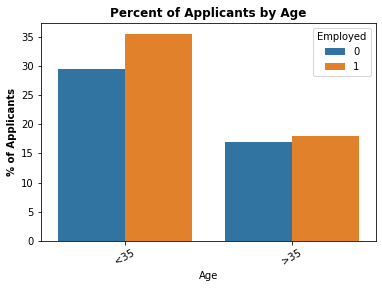

In [24]:
#age
paired_bar(df=df,var='Age', title='Percent of Applicants by Age')

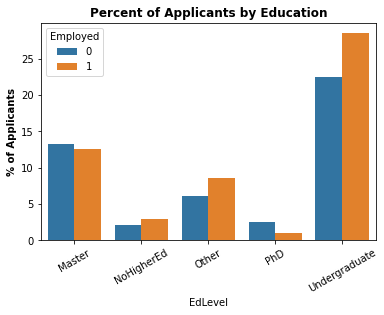

In [25]:
#education
paired_bar(df=df,var='EdLevel', title='Percent of Applicants by Education')

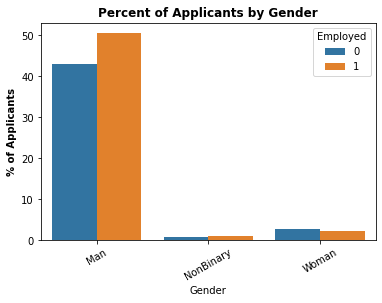

In [26]:
#gender
paired_bar(df=df,var='Gender', title='Percent of Applicants by Gender')

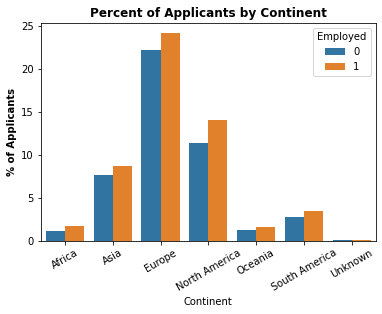

In [27]:
#continent
paired_bar(df=df,var='Continent', title='Percent of Applicants by Continent')

Text(0.5, 0, 'Number of Computer Skills/Languages')

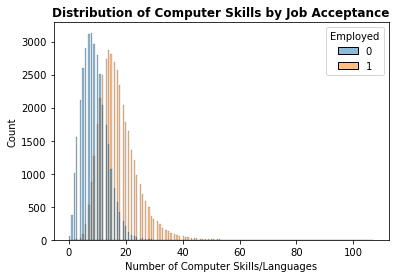

In [28]:
#amount of computer skills
a= sns.histplot(data=df, x="ComputerSkills", hue="Employed")
a.set_title('Distribution of Computer Skills by Job Acceptance', fontweight = 'bold')
a.set_xlabel('Number of Computer Skills/Languages')

In [ ]:
#Additional Graphs

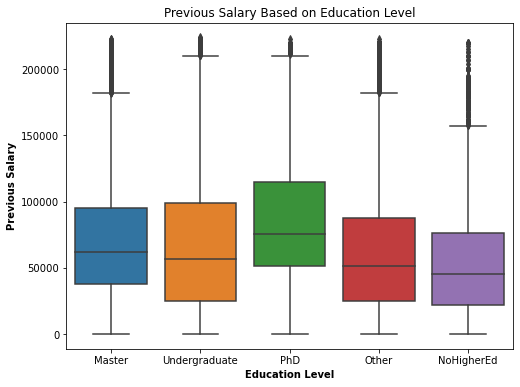

In [29]:
data = df
plt.figure(figsize=(8, 6))
x=sns.boxplot(x="EdLevel", y="PreviousSalary", data =df)
x.set_ylabel('Previous Salary', fontweight = 'bold', fontsize = 10)
x.set_xlabel ('Education Level',fontweight = 'bold', fontsize = 10)
plt.title('Previous Salary Based on Education Level')
plt.show()

In [45]:
def plot_target_dist(df):
    #choosing different possible color theme
    color = ['#c3f9dc','#bfc6f9', '#aae3f4']
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    
    #Combined plots, first one is pie
    plt.subplot(121)
    plt.pie(df.EdLevel.value_counts(),labels = ['Master', 'Undergraduate', 'PhD','Other','NoHigherEd'], colors = color,
            autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Previous Salary Based on Education Level', fontsize = 30, fontweight = 'bold')

    #Combined plots, second one is a boxplot
    plt.subplot(122)
    t=sns.boxplot(x='EdLevel',
                y='PreviousSalary',
                  palette=color,
                data=df)
    plt.title('Previous Salary Based on Education Level', fontsize=40, fontweight = 'bold')
    t.set_xlabel('Education Level', fontweight = 'bold', fontsize = 30)
    t.set_ylabel('Previous Salary', fontweight = 'bold', fontsize = 30)

    plt.tight_layout()

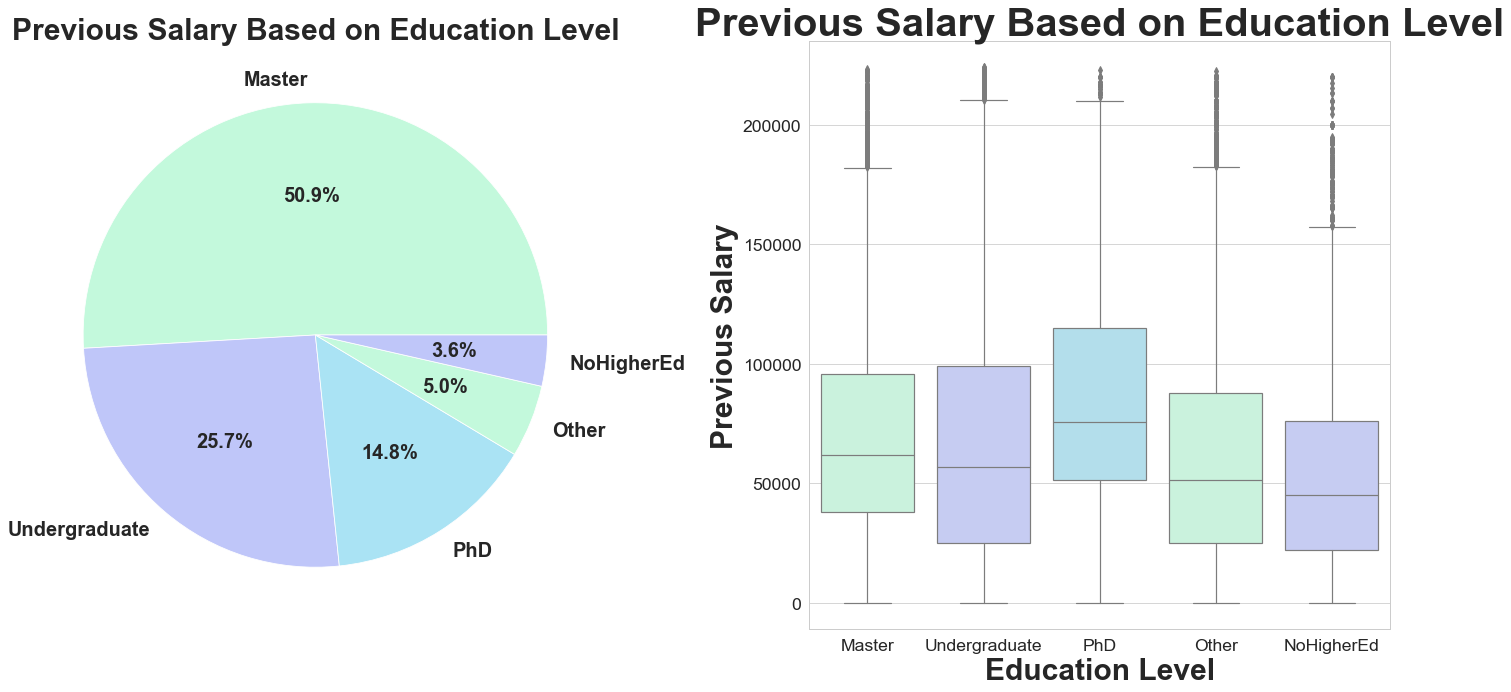

In [46]:
plot_target_dist(df)

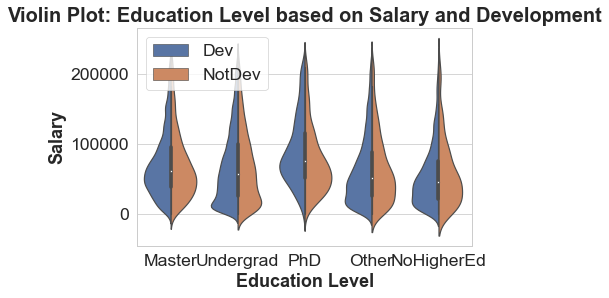

In [59]:
plt.subplot()
x = sns.violinplot(x='EdLevel', y='PreviousSalary', hue='MainBranch', data=df, split = True)

#setting title and axis labels
x.set_title('Violin Plot: Education Level based on Salary and Development', fontsize = 20, fontweight = 'bold')
x.set_ylabel('Salary', fontweight = 'bold', fontsize = 18)
x.set_xlabel ('Education Level',fontweight = 'bold', fontsize = 18)
x.set(xticklabels=['Master','Undergrad','PhD', 'Other','NoHigherEd'])

x.legend(loc='upper left')